# Exoplanets A: Direct Imaging
*Author: Lukas Welzel*

_<<<Add your name if you contribute to the notebook>>>_

## Purpose
Collect basic plots for the assignment.

## WIP - improvements
Notable TODOs:
-

## Library Import + Setup

In [2]:
# Data manipulation
import pandas as pd
import numpy as np

# Options for pandas
pd.options.display.max_columns = 50
pd.options.display.max_rows = 10

# Visualizations
import plotly
import plotly.graph_objs as go
import plotly.offline as ply
plotly.offline.init_notebook_mode(connected=True)

import matplotlib as mpl
import matplotlib.pyplot as plt
from labellines import labelLine, labelLines # TODO: cite https://github.com/cphyc/matplotlib-label-lines here https://zenodo.org/record/7428071
# TODO: put in pull request for above modification to supply custom labels to each line in labellines
from matplotlib.widgets import Slider, Button
from mpl_toolkits.axes_grid1 import make_axes_locatable
RGbinary = mpl.colors.ListedColormap(['red', 'green'])

import seaborn as sns
import mpld3
from ipywidgets import *

%matplotlib notebook
%matplotlib inline
plt.rcParams['figure.figsize'] = [15, 5]
plt.rcParams['figure.dpi'] = 300

# Autoreload extension
if 'autoreload' not in get_ipython().extension_manager.loaded:
    %load_ext autoreload

%autoreload 2

# other
from tqdm import tqdm
from copy import deepcopy
from itertools import product

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
%matplotlib inline

## Data Import
Available data:
['plntname', 'ra_str', 'ra', 'dec_str', 'dec', 'imdelthmag', 'imdelthmagerr', 'imdelthmaglim', 'imdeltjmag', 'imdeltjmagerr', 'imdeltjmaglim', 'imdeltkmag', 'imdeltkmagerr', 'imdeltkmaglim', 'imdeltlpmag', 'imdeltlpmagerr', 'imdeltlpmaglim', 'imangsep', 'imangseperr1', 'imangseperr2', 'imangseplim', 'imsep', 'imseperr1', 'imseperr2', 'imseplim', 'imtruesep', 'imtrueseperr1', 'imtrueseperr2', 'imtrueseplim', 'impa', 'impaerr1', 'impaerr2', 'impalim', 'imdist', 'imdisterr1', 'imdisterr2', 'imdistlim', 'imtelescope', 'iminstrument', 'imdateobs', 'imcluster', 'imreflink', 'imdisk', 'imcorona', 'imifu', 'ns', 'glon', 'glat', 'imjmag', 'imjmagerr', 'imjmaglim', 'imhmag', 'imhmagerr', 'imhmaglim', 'imkmag', 'imkmagerr', 'imkmaglim', 'imlpmag', 'imlpmagerr', 'imlpmaglim', 'implnjmag', 'implnjmagerr', 'implnjmaglim', 'implnhmag', 'implnhmagerr', 'implnhmaglim', 'implnkmag', 'implnkmagerr', 'implnkmaglim', 'implnlpmag', 'implnlpmagerr', 'implnlpmaglim', 'imstype', 'immass', 'immasserr1', 'immasserr2', 'immasslim', 'image', 'imageerr1', 'imageerr2', 'imagelim', 'imlum', 'imlumerr1', 'imlumerr2', 'imlumlim', 'implmass', 'implmasserr1', 'implmasserr2', 'implmasslim', 'implstype', 'impltemp', 'impltemperr1', 'impltemperr2', 'impltemplim', 'implradius', 'implradiuserr1', 'implradiuserr2', 'implradiuslim', 'immodel', 'immodeldef', 'imnotes']

In [15]:
EXOPLANET_ARCHIVE_DATA_FILE = "directimaging_filtered_2023.03.27_02.37.46.csv"
data = pd.read_csv(EXOPLANET_ARCHIVE_DATA_FILE, header=107)

wanted_cols = [
    'plntname',
    'ra_str',
    'ra', 'dec_str',
    'dec',
    'imsep', 'imseperr1', 'imseperr2', 'imseplim',
    'imdist', 'imdisterr1', 'imdisterr2', 'imdistlim',
    'imtelescope', 'iminstrument',
    'imdateobs',
    'imcluster',
    'imreflink',
    'imdisk',
    'imcorona', 'imifu',
    'imstype', 'immass', 'immasserr1', 'immasserr2', 'immasslim',
    'image', 'imageerr1', 'imageerr2', 'imagelim',
    'imlum', 'imlumerr1', 'imlumerr2', 'imlumlim',
    'implmass', 'implmasserr1', 'implmasserr2', 'implmasslim',
    'implstype',
    'impltemp', 'impltemperr1', 'impltemperr2', 'impltemplim',
    'implradius', 'implradiuserr1', 'implradiuserr2', 'implradiuslim',
    'immodel', 'immodeldef',
    'imnotes'
]

reduced = data[wanted_cols]

wanted_planet_cols = [
    'plntname',
    'imsep', 'imseperr1', 'imseperr2', 'imseplim',
    'implmass', 'implmasserr1', 'implmasserr2', 'implmasslim',
    'implstype',
    'impltemp', 'impltemperr1', 'impltemperr2', 'impltemplim',
    'implradius', 'implradiuserr1', 'implradiuserr2', 'implradiuslim',
]

planets = reduced[wanted_planet_cols]

wanted_planet_simple_cols = [
    'plntname',
    'imsep',
    'implmass',
    'implstype',
    'impltemp',
    'implradius',
]

planets_simple = planets[wanted_planet_simple_cols]

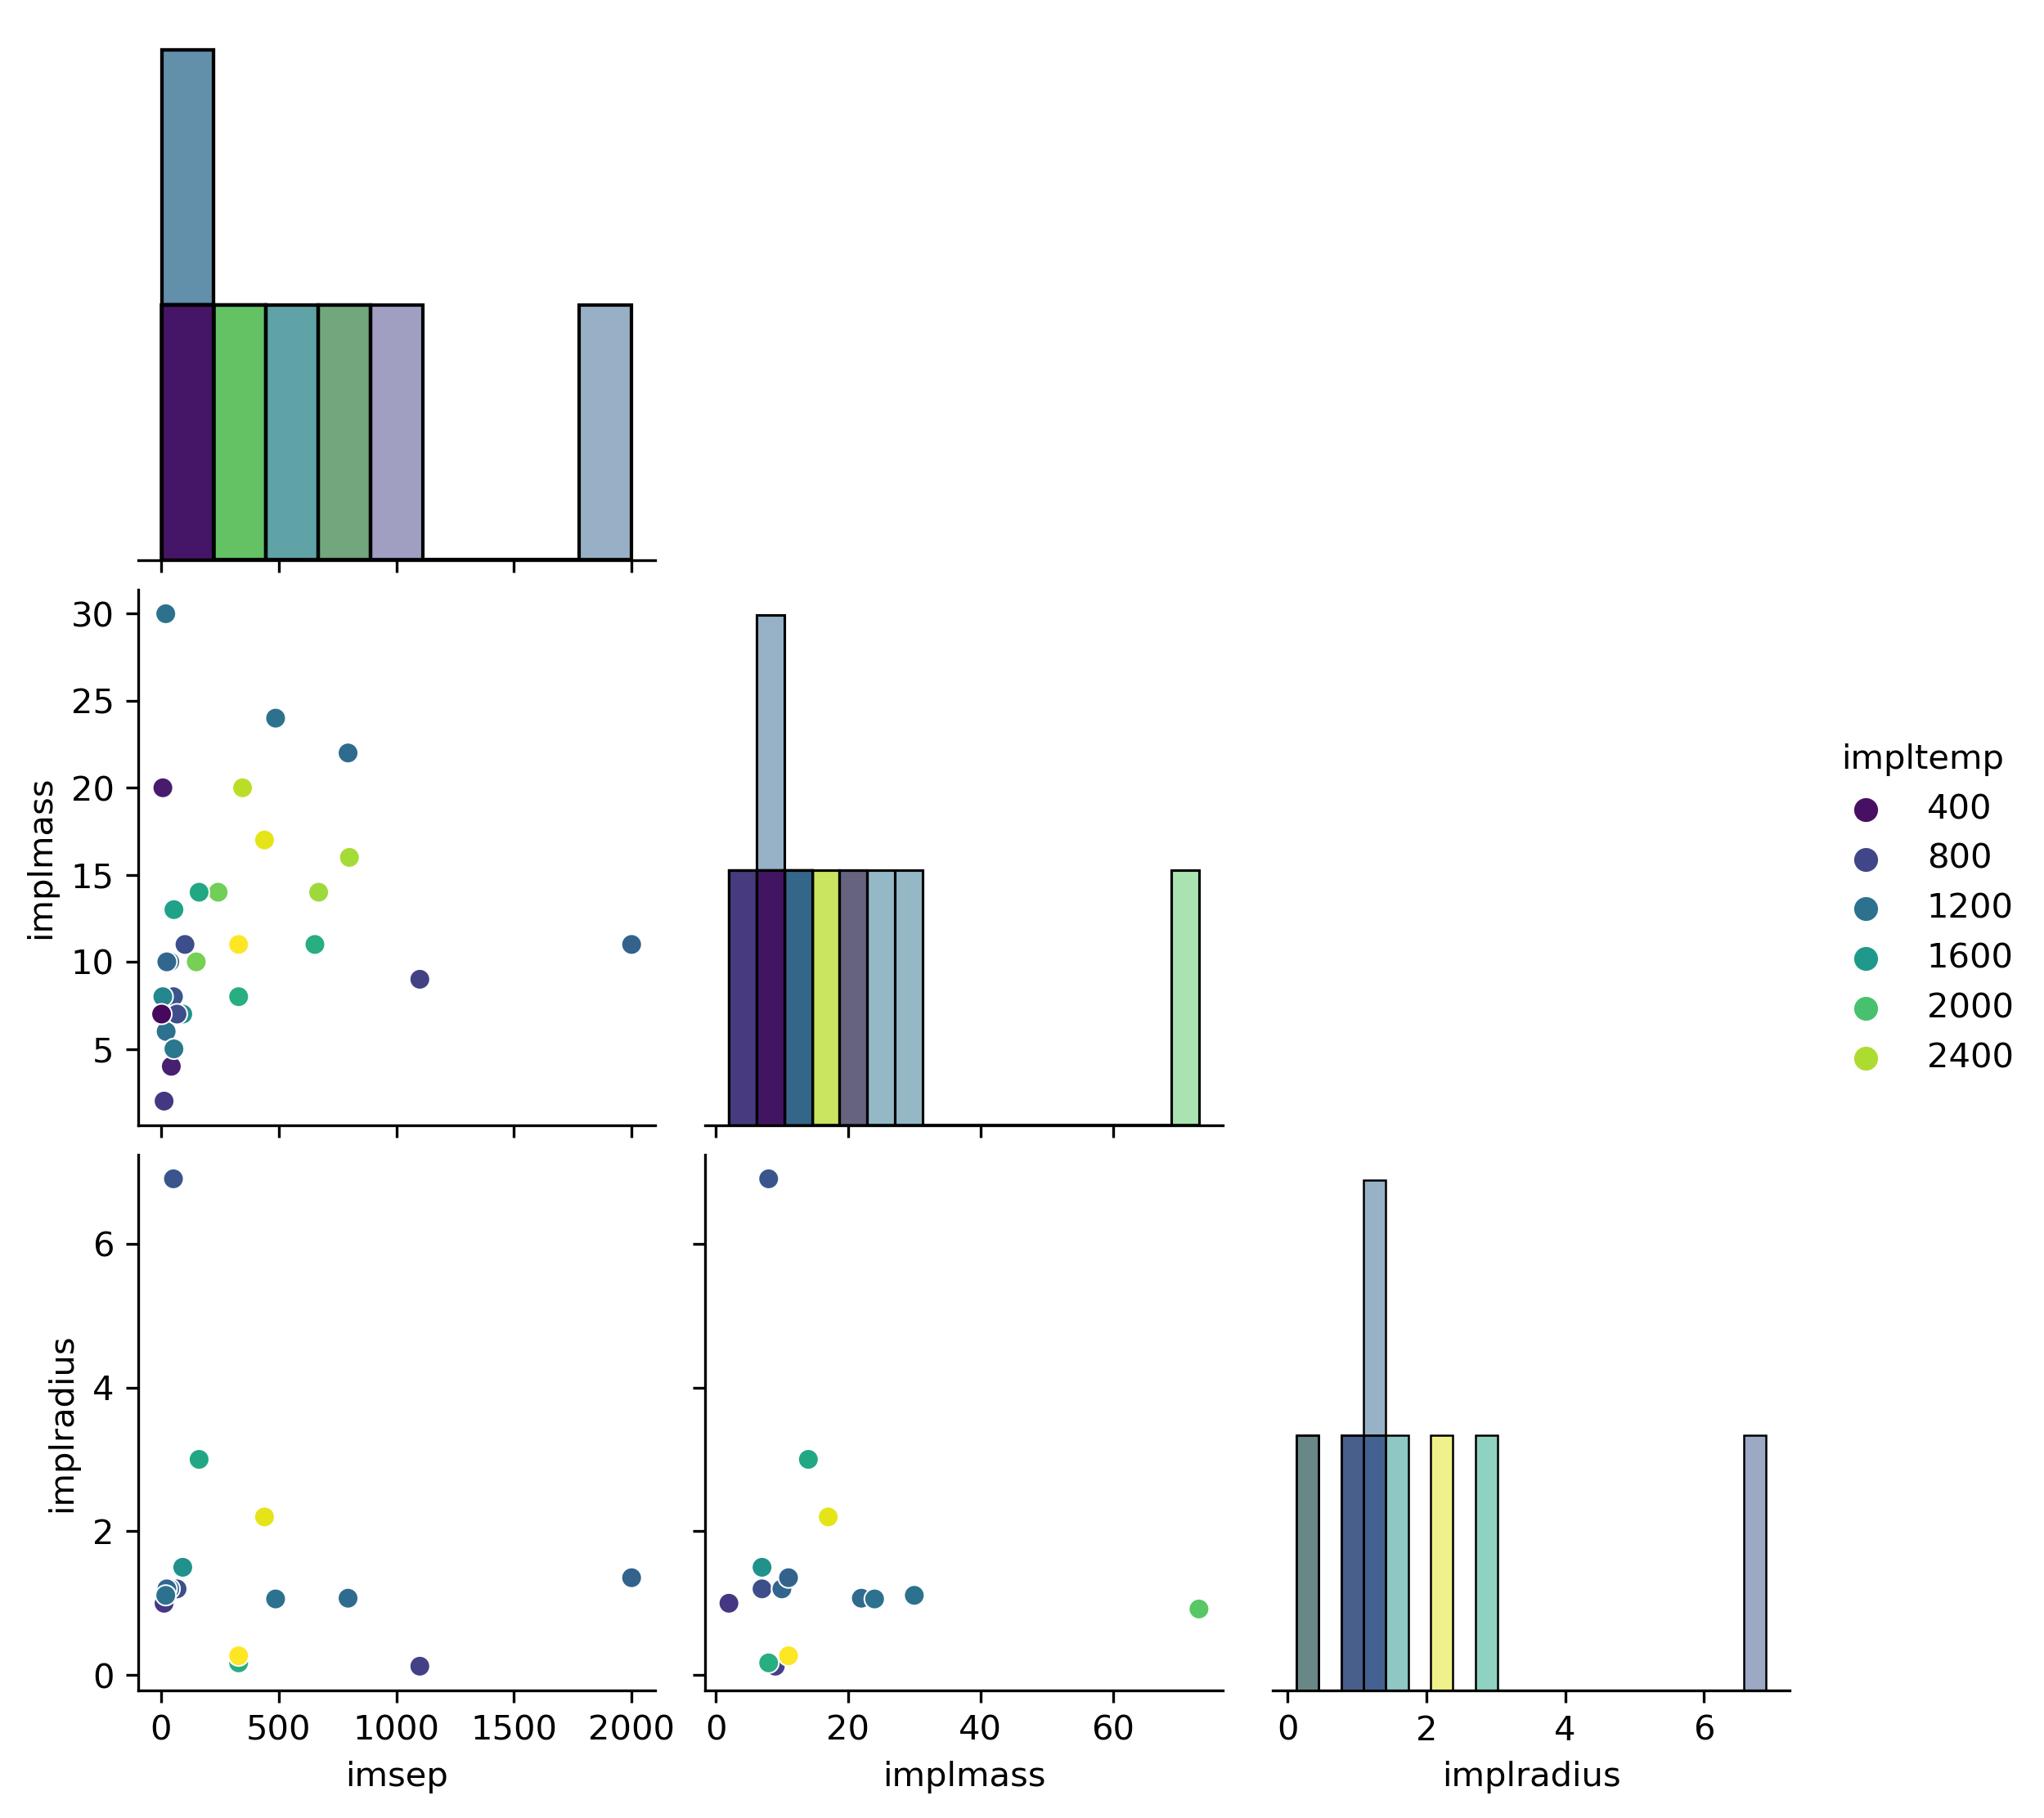

In [17]:
sns.pairplot(planets_simple[wanted_planet_simple_cols[1:]],
             hue="impltemp", palette="viridis",
             kind="scatter", diag_kind="hist",
             corner=True)
plt.savefig("corner_simple.png", dpi=350)
plt.show()